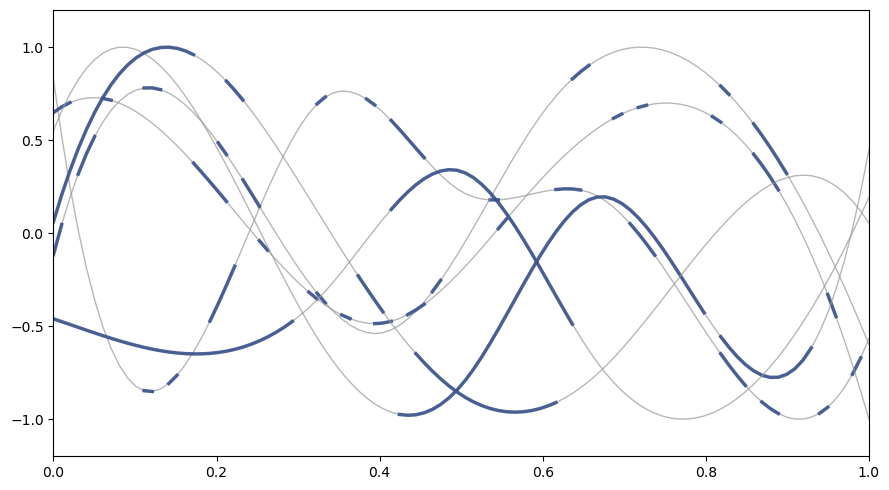

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

np.random.seed(4)

x = np.linspace(0, 1, 100)
main_color = plt.cm.viridis(0.25)
missing_color = "#999999"

plt.figure(figsize=(9, 5))

functions = []

# Generate 6 distinct smooth spline-like curves
for i in range(6):
    x_ctrl = np.linspace(0, 1, np.random.randint(5, 8))  # 5–7 control points
    y_ctrl = np.random.uniform(-1, 1, len(x_ctrl))
    spline = make_interp_spline(x_ctrl, y_ctrl, k=3)
    y_smooth = spline(x)
    y_smooth = y_smooth / np.max(np.abs(y_smooth))
    functions.append(y_smooth)

# Plot each curve with missing data
for i, f in enumerate(functions):
    # Start with full function in grey
    plt.plot(x, f, color=missing_color, alpha=0.7, linewidth=1)

    # Create mask for observed points
    if i < 3:
        # Scatter missing pattern (~50%)
        mask = np.random.rand(len(x)) > 0.5
    else:
        # Interval missing pattern
        mask = np.ones(len(x), dtype=bool)
        breaks = np.sort(np.random.choice(np.arange(1, len(x)-1), size=9, replace=False))
        segments = np.split(np.arange(len(x)), breaks)
        missing_segments = np.random.choice(len(segments), size=len(segments)//2, replace=False)
        for j in missing_segments:
            mask[segments[j]] = False

    # Insert NaN for missing data so line is broken
    f_plot = f.copy()
    f_plot[~mask] = np.nan

    # Plot observed parts only
    plt.plot(x, f_plot, color=main_color, alpha=0.9, linewidth=2.5)

plt.xlim(0, 1)
plt.ylim(-1.2, 1.2)
plt.tight_layout()
plt.show()





In [ ]:
# read memberships
import pandas as pd
import plotly.graph_objects as go
memberships_mv = pd.read_csv("output_competitors/2d/mv/gauss/memberships.csv", header=None)

labels_mv = memberships_mv.iloc[s, :].values

dataset = pd.read_csv(f"data/2d/gauss/gauss_{s}.csv", header=None)

# compute the centroids
c1 = dataset.values[labels_mv == 1, :].mean(axis=0)
c2 = dataset.values[labels_mv == 2, :].mean(axis=0)
c3 = dataset.values[labels_mv == 3, :].mean(axis=0)

nodes = pd.read_csv("data/2d/nodes.csv", header=None)

x2d_unique = nodes.iloc[:, 0].unique()
y2d_unique = nodes.iloc[:, 1].unique()

c1_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c1_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c1_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c1_surface.iloc[j, 2] = c1[j]
c1_surface.columns = ["x", "y", "z"]
c1_Z = c1_surface.pivot_table(index='y', columns='x', values='z').values

c2_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c2_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c2_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c2_surface.iloc[j, 2] = c2[j]
c2_surface.columns = ["x", "y", "z"]
c2_Z = c2_surface.pivot_table(index='y', columns='x', values='z').values

c3_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c3_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c3_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c3_surface.iloc[j, 2] = c3[j]
c3_surface.columns = ["x", "y", "z"]
c3_Z = c3_surface.pivot_table(index='y', columns='x', values='z').values

for C in [c1_Z, c2_Z, c3_Z]:
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=x2d_unique, y=y2d_unique, z=C,
        colorscale='Viridis',
        name=f'Sample {i}',
        contours=dict(showlabels=True)
    ))
    fig.update_layout(
        xaxis_title="X",
        yaxis_title="Y",
        height=700,
        width=700
    )

    for gx in np.arange(min(x2d_unique), max(x2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[gx, gx],
            y=[min(y2d_unique), max(y2d_unique)],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    for gy in np.arange(min(y2d_unique), max(y2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[min(x2d_unique), max(x2d_unique)],
            y=[gy, gy],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1])
    
    fig.show()

In [18]:
# read memberships
import plotly.graph_objects as go
memberships_mv = pd.read_csv("output_competitors/2d/geomstats/gauss/memberships.csv", header=None)

labels_mv = memberships_mv.iloc[s, :].values

dataset = pd.read_csv(f"data/2d/gauss/gauss_{s}.csv", header=None)

# compute the centroids
c1 = dataset.values[labels_mv == 0, :].mean(axis=0)
c2 = dataset.values[labels_mv == 1, :].mean(axis=0)
c3 = dataset.values[labels_mv == 2, :].mean(axis=0)

nodes = pd.read_csv("data/2d/nodes.csv", header=None)

x2d_unique = nodes.iloc[:, 0].unique()
y2d_unique = nodes.iloc[:, 1].unique()

c1_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c1_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c1_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c1_surface.iloc[j, 2] = c1[j]
c1_surface.columns = ["x", "y", "z"]
c1_Z = c1_surface.pivot_table(index='y', columns='x', values='z').values

c2_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c2_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c2_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c2_surface.iloc[j, 2] = c2[j]
c2_surface.columns = ["x", "y", "z"]
c2_Z = c2_surface.pivot_table(index='y', columns='x', values='z').values

c3_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c3_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c3_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c3_surface.iloc[j, 2] = c3[j]
c3_surface.columns = ["x", "y", "z"]
c3_Z = c3_surface.pivot_table(index='y', columns='x', values='z').values

for C in [c1_Z, c2_Z, c3_Z]:
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=x2d_unique, y=y2d_unique, z=C,
        colorscale='Viridis',
        name=f'Sample {i}',
        contours=dict(showlabels=True)
    ))
    fig.update_layout(
        xaxis_title="X",
        yaxis_title="Y",
        height=700,
        width=700
    )

    for gx in np.arange(min(x2d_unique), max(x2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[gx, gx],
            y=[min(y2d_unique), max(y2d_unique)],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    for gy in np.arange(min(y2d_unique), max(y2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[min(x2d_unique), max(x2d_unique)],
            y=[gy, gy],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1])
    
    fig.show()

In [20]:
# read memberships
import plotly.graph_objects as go
memberships_mv = pd.read_csv("output_competitors/2d/smooth_geomstats/gauss/memberships.csv", header=None)

labels_mv = memberships_mv.iloc[s, :].values

dataset = pd.read_csv(f"data/2d/smooth/gauss/gauss_{s}.csv", header=None)

# compute the centroids
c1 = dataset.values[labels_mv == 0, :].mean(axis=0)
c2 = dataset.values[labels_mv == 1, :].mean(axis=0)
c3 = dataset.values[labels_mv == 2, :].mean(axis=0)

nodes = pd.read_csv("data/2d/nodes.csv", header=None)

x2d_unique = nodes.iloc[:, 0].unique()
y2d_unique = nodes.iloc[:, 1].unique()

c1_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c1_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c1_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c1_surface.iloc[j, 2] = c1[j]
c1_surface.columns = ["x", "y", "z"]
c1_Z = c1_surface.pivot_table(index='y', columns='x', values='z').values

c2_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c2_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c2_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c2_surface.iloc[j, 2] = c2[j]
c2_surface.columns = ["x", "y", "z"]
c2_Z = c2_surface.pivot_table(index='y', columns='x', values='z').values

c3_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c3_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c3_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c3_surface.iloc[j, 2] = c3[j]
c3_surface.columns = ["x", "y", "z"]
c3_Z = c3_surface.pivot_table(index='y', columns='x', values='z').values

for C in [c1_Z, c2_Z, c3_Z]:
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=x2d_unique, y=y2d_unique, z=C,
        colorscale='Viridis',
        name=f'Sample {i}',
        contours=dict(showlabels=True)
    ))
    fig.update_layout(
        xaxis_title="X",
        yaxis_title="Y",
        height=700,
        width=700
    )

    for gx in np.arange(min(x2d_unique), max(x2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[gx, gx],
            y=[min(y2d_unique), max(y2d_unique)],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    for gy in np.arange(min(y2d_unique), max(y2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[min(x2d_unique), max(x2d_unique)],
            y=[gy, gy],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1])
    
    fig.show()

In [21]:
# read memberships
import plotly.graph_objects as go
memberships_mv = pd.read_csv("output_competitors/reconstructed/2d/dineof/scatter/geomstats/gauss/memberships.csv", header=None)

labels_mv = memberships_mv.iloc[s, :].values

dataset = pd.read_csv(f"data_reconstructed/2d/scatter/gauss/dineof/dineof_{s}.csv", header=None)

# compute the centroids
c1 = dataset.values[labels_mv == 0, :].mean(axis=0)
c2 = dataset.values[labels_mv == 1, :].mean(axis=0)
c3 = dataset.values[labels_mv == 2, :].mean(axis=0)

nodes = pd.read_csv("data/2d/nodes.csv", header=None)

x2d_unique = nodes.iloc[:, 0].unique()
y2d_unique = nodes.iloc[:, 1].unique()

c1_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c1_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c1_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c1_surface.iloc[j, 2] = c1[j]
c1_surface.columns = ["x", "y", "z"]
c1_Z = c1_surface.pivot_table(index='y', columns='x', values='z').values

c2_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c2_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c2_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c2_surface.iloc[j, 2] = c2[j]
c2_surface.columns = ["x", "y", "z"]
c2_Z = c2_surface.pivot_table(index='y', columns='x', values='z').values

c3_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c3_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c3_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c3_surface.iloc[j, 2] = c3[j]
c3_surface.columns = ["x", "y", "z"]
c3_Z = c3_surface.pivot_table(index='y', columns='x', values='z').values

for C in [c1_Z, c2_Z, c3_Z]:
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=x2d_unique, y=y2d_unique, z=C,
        colorscale='Viridis',
        name=f'Sample {i}',
        contours=dict(showlabels=True)
    ))
    fig.update_layout(
        xaxis_title="X",
        yaxis_title="Y",
        height=700,
        width=700
    )

    for gx in np.arange(min(x2d_unique), max(x2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[gx, gx],
            y=[min(y2d_unique), max(y2d_unique)],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    for gy in np.arange(min(y2d_unique), max(y2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[min(x2d_unique), max(x2d_unique)],
            y=[gy, gy],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1])
    
    fig.show()

In [22]:
# read memberships
import plotly.graph_objects as go
memberships_mv = pd.read_csv("output_competitors/reconstructed/2d/dineof/area/geomstats/gauss/memberships.csv", header=None)

labels_mv = memberships_mv.iloc[s, :].values

dataset = pd.read_csv(f"data_reconstructed/2d/area/gauss/dineof/dineof_{s}.csv", header=None)

# compute the centroids
c1 = dataset.values[labels_mv == 0, :].mean(axis=0)
c2 = dataset.values[labels_mv == 1, :].mean(axis=0)
c3 = dataset.values[labels_mv == 2, :].mean(axis=0)

nodes = pd.read_csv("data/2d/nodes.csv", header=None)

x2d_unique = nodes.iloc[:, 0].unique()
y2d_unique = nodes.iloc[:, 1].unique()

c1_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c1_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c1_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c1_surface.iloc[j, 2] = c1[j]
c1_surface.columns = ["x", "y", "z"]
c1_Z = c1_surface.pivot_table(index='y', columns='x', values='z').values

c2_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c2_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c2_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c2_surface.iloc[j, 2] = c2[j]
c2_surface.columns = ["x", "y", "z"]
c2_Z = c2_surface.pivot_table(index='y', columns='x', values='z').values

c3_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c3_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c3_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c3_surface.iloc[j, 2] = c3[j]
c3_surface.columns = ["x", "y", "z"]
c3_Z = c3_surface.pivot_table(index='y', columns='x', values='z').values

for C in [c1_Z, c2_Z, c3_Z]:
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=x2d_unique, y=y2d_unique, z=C,
        colorscale='Viridis',
        name=f'Sample {i}',
        contours=dict(showlabels=True)
    ))
    fig.update_layout(
        xaxis_title="X",
        yaxis_title="Y",
        height=700,
        width=700
    )

    for gx in np.arange(min(x2d_unique), max(x2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[gx, gx],
            y=[min(y2d_unique), max(y2d_unique)],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    for gy in np.arange(min(y2d_unique), max(y2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[min(x2d_unique), max(x2d_unique)],
            y=[gy, gy],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1])
    
    fig.show()

In [24]:
# read memberships
import plotly.graph_objects as go
memberships_mv = pd.read_csv("output_competitors/reconstructed/2d/tps/scatter/geomstats/gauss/memberships.csv", header=None)

labels_mv = memberships_mv.iloc[s, :].values

dataset = pd.read_csv(f"data_reconstructed/2d/scatter/gauss/tps/tps_{s}.csv", header=None)

# compute the centroids
c1 = dataset.values[labels_mv == 0, :].mean(axis=0)
c2 = dataset.values[labels_mv == 1, :].mean(axis=0)
c3 = dataset.values[labels_mv == 2, :].mean(axis=0)

nodes = pd.read_csv("data/2d/nodes.csv", header=None)

x2d_unique = nodes.iloc[:, 0].unique()
y2d_unique = nodes.iloc[:, 1].unique()

c1_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c1_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c1_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c1_surface.iloc[j, 2] = c1[j]
c1_surface.columns = ["x", "y", "z"]
c1_Z = c1_surface.pivot_table(index='y', columns='x', values='z').values

c2_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c2_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c2_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c2_surface.iloc[j, 2] = c2[j]
c2_surface.columns = ["x", "y", "z"]
c2_Z = c2_surface.pivot_table(index='y', columns='x', values='z').values

c3_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c3_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c3_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c3_surface.iloc[j, 2] = c3[j]
c3_surface.columns = ["x", "y", "z"]
c3_Z = c3_surface.pivot_table(index='y', columns='x', values='z').values

for C in [c1_Z, c2_Z, c3_Z]:
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=x2d_unique, y=y2d_unique, z=C,
        colorscale='Viridis',
        name=f'Sample {i}',
        contours=dict(showlabels=True)
    ))
    fig.update_layout(
        xaxis_title="X",
        yaxis_title="Y",
        height=700,
        width=700
    )

    for gx in np.arange(min(x2d_unique), max(x2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[gx, gx],
            y=[min(y2d_unique), max(y2d_unique)],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    for gy in np.arange(min(y2d_unique), max(y2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[min(x2d_unique), max(x2d_unique)],
            y=[gy, gy],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1])
    
    fig.show()

In [25]:
# read memberships
import plotly.graph_objects as go
memberships_mv = pd.read_csv("output_competitors/reconstructed/2d/tps/area/geomstats/gauss/memberships.csv", header=None)

labels_mv = memberships_mv.iloc[s, :].values

dataset = pd.read_csv(f"data_reconstructed/2d/area/gauss/tps/tps_{s}.csv", header=None)

# compute the centroids
c1 = dataset.values[labels_mv == 0, :].mean(axis=0)
c2 = dataset.values[labels_mv == 1, :].mean(axis=0)
c3 = dataset.values[labels_mv == 2, :].mean(axis=0)

nodes = pd.read_csv("data/2d/nodes.csv", header=None)

x2d_unique = nodes.iloc[:, 0].unique()
y2d_unique = nodes.iloc[:, 1].unique()

c1_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c1_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c1_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c1_surface.iloc[j, 2] = c1[j]
c1_surface.columns = ["x", "y", "z"]
c1_Z = c1_surface.pivot_table(index='y', columns='x', values='z').values

c2_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c2_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c2_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c2_surface.iloc[j, 2] = c2[j]
c2_surface.columns = ["x", "y", "z"]
c2_Z = c2_surface.pivot_table(index='y', columns='x', values='z').values

c3_surface = pd.DataFrame(np.zeros((nodes.shape[0], 3)))
for j in range(nodes.shape[0]):
    c3_surface.iloc[j, 0] = nodes.iloc[j, 0]
    c3_surface.iloc[j, 1] = nodes.iloc[j, 1]
    c3_surface.iloc[j, 2] = c3[j]
c3_surface.columns = ["x", "y", "z"]
c3_Z = c3_surface.pivot_table(index='y', columns='x', values='z').values

for C in [c1_Z, c2_Z, c3_Z]:
    fig = go.Figure()
    fig.add_trace(go.Contour(
        x=x2d_unique, y=y2d_unique, z=C,
        colorscale='Viridis',
        name=f'Sample {i}',
        contours=dict(showlabels=True)
    ))
    fig.update_layout(
        xaxis_title="X",
        yaxis_title="Y",
        height=700,
        width=700
    )

    for gx in np.arange(min(x2d_unique), max(x2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[gx, gx],
            y=[min(y2d_unique), max(y2d_unique)],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    for gy in np.arange(min(y2d_unique), max(y2d_unique), 0.2):
        fig.add_trace(go.Scatter(
            x=[min(x2d_unique), max(x2d_unique)],
            y=[gy, gy],
            mode="lines",
            line=dict(color="white", width=1),
            showlegend=False
        ))

    fig.update_xaxes(range=[0, 1])
    fig.update_yaxes(range=[0, 1])
    
    fig.show()